<div style="background-color:#dceeff; border-radius: 15px; padding: 30px; border: 1px solid #c0e0f9;">

<h1 style="text-align: center; font-size: 36px; color: #003366;">
🚀 <strong> Challenge IA/Data IBM x Télécom Paris 2025 </strong> 🚀
</h1>

<h2 style="text-align: center; font-size: 24px; color: #004080;">
<strong>Équipe</strong> : Jérôme Kernel
</h2>

<p style="text-align: center;font-size: 18px; line-height: 1.8; margin-left: 20px;color: #004080;">
<strong>Kerboua Abdennour</strong> · <strong>Akbarinia Daniel</strong> · <strong>Pelissier Etienne</strong>
</p>

</div>

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')
import json
%matplotlib inline

#from googledrivedownloader import download_file_from_google_drive

<div style="color:#00ADB5;
           display:fill;
           border-radius:10px;
           background-color:#393E46;
           font-size:20px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 5px; padding-left:20px;
              color:white;">
            <b>   Load the Data</b>
        </p>
</div>

In [149]:
# download_file_from_google_drive(file_id='1NgAi81cpQHr3TjSLXFa-I6NUmwGxn2AO',
#   dest_path='./data/transactions_train.csv')
# download_file_from_google_drive(file_id='1SaufGRRiWve-sl-KvxgA9aq6MhYmZ_S7',
#  dest_path='./data/evaluation_features.csv')
# download_file_from_google_drive(file_id='13kk37vZtbm-dCG3YFU_43qbh05ChLfnd',
#  dest_path='./data/train_fraud_labels.json')
# download_file_from_google_drive(file_id='1dWSC2g2uOxNJoF81Idp5zCwuYjOI7iXU',
#  dest_path='./data/users_data.csv')
# download_file_from_google_drive(file_id='1E9yiiALloasCtHnvbAvkWyx-9hzKsUhX',
#  dest_path='./data/cards_data.csv')

In [150]:
!pwd

/Users/abdennourkerboua/Downloads/hackthon data


In [151]:
df_train_no_label = pd.read_csv("data/transactions_train.csv",delimiter=',')
df_test = pd.read_csv("data/evaluation_features.csv",delimiter=',')

In [152]:
display(df_train_no_label.head())
display(df_test.head())

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,19765990,2017-07-07 09:53:00,1581,2519,$12.35,Chip Transaction,20519,Arnold,MO,63010.0,5942,NaN
1,22160255,2018-11-26 17:44:00,1862,4049,$58.29,Chip Transaction,98648,Des Moines,IA,50313.0,5814,NaN
2,17566794,2016-03-26 12:42:00,1967,3367,$11.03,Chip Transaction,46978,Lake Forest,CA,92630.0,5411,NaN
3,17318690,2016-02-01 08:30:00,921,3457,$85.74,Chip Transaction,63701,Rush,NY,14543.0,5411,NaN
4,20994060,2018-03-24 14:42:00,456,2800,$13.43,Chip Transaction,83271,Estero,FL,33928.0,4214,NaN


,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,23042130,2019-06-01 14:41:00,900,3412,$118.61,Swipe Transaction,61195,Panama City,FL,32401.0,5541,NaN
1,22702314,2019-03-21 13:45:00,1741,3025,$-204.00,Chip Transaction,49637,Tucson,AZ,85736.0,3509,NaN
2,22838524,2019-04-19 11:53:00,1081,3892,$-99.00,Chip Transaction,43293,Aurora,CO,80013.0,5499,NaN
3,23477219,2019-09-01 11:46:00,1740,2382,$28.44,Chip Transaction,26032,Mukwonago,WI,53149.0,7210,NaN
4,23066897,2019-06-06 21:24:00,1207,6056,$32.02,Online Transaction,39021,ONLINE,NaN,NaN,4784,NaN


In [153]:
with open("data/train_fraud_labels.json", "r") as f:
    fraud_dict = json.load(f)
print(fraud_dict.keys())
df_fraud = pd.DataFrame([
    {"id": int(k), "fraud": 1 if v == "Yes" else 0}
    for k, v in fraud_dict["target"].items()
])

dict_keys(['target'])


In [154]:
df_fraud.head()

,id,fraud
0,19765990,0
1,22160255,0
2,17566794,0
3,17318690,0
4,20994060,0


In [155]:
df_train = df_train_no_label.merge(df_fraud, left_on="transaction_id", right_on="id", how="left").drop("id",axis=1)

In [156]:
df_train.to_csv('df_train.csv', index=False)1

In [157]:
print(len(df_train))
df_train.head()

210000


,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,fraud
0,19765990,2017-07-07 09:53:00,1581,2519,$12.35,Chip Transaction,20519,Arnold,MO,63010.0,5942,NaN,0
1,22160255,2018-11-26 17:44:00,1862,4049,$58.29,Chip Transaction,98648,Des Moines,IA,50313.0,5814,NaN,0
2,17566794,2016-03-26 12:42:00,1967,3367,$11.03,Chip Transaction,46978,Lake Forest,CA,92630.0,5411,NaN,0
3,17318690,2016-02-01 08:30:00,921,3457,$85.74,Chip Transaction,63701,Rush,NY,14543.0,5411,NaN,0
4,20994060,2018-03-24 14:42:00,456,2800,$13.43,Chip Transaction,83271,Estero,FL,33928.0,4214,NaN,0


In [158]:
print(len(df_test))
df_test.head()

90000


,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,23042130,2019-06-01 14:41:00,900,3412,$118.61,Swipe Transaction,61195,Panama City,FL,32401.0,5541,NaN
1,22702314,2019-03-21 13:45:00,1741,3025,$-204.00,Chip Transaction,49637,Tucson,AZ,85736.0,3509,NaN
2,22838524,2019-04-19 11:53:00,1081,3892,$-99.00,Chip Transaction,43293,Aurora,CO,80013.0,5499,NaN
3,23477219,2019-09-01 11:46:00,1740,2382,$28.44,Chip Transaction,26032,Mukwonago,WI,53149.0,7210,NaN
4,23066897,2019-06-06 21:24:00,1207,6056,$32.02,Online Transaction,39021,ONLINE,NaN,NaN,4784,NaN


In [159]:
cards_data = pd.read_csv("data/cards_data.csv",delimiter=',')
users_data = pd.read_csv("data/users_data.csv",delimiter=',')

In [160]:
cards_data.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [161]:
users_data.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [162]:
df_train.columns

Index(['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'fraud'],
      dtype='object')

In [163]:
cards_data = cards_data.rename(columns={'id':'card_id'})

In [164]:
users_data = users_data.rename(columns={'id':'client_id'})

In [165]:
users_data.head()

,client_id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [166]:
df_train = df_train.merge(cards_data.drop(columns=["client_id"]), left_on='card_id', right_on='card_id', how="left")

In [167]:
df_train.head()

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,19765990,2017-07-07 09:53:00,1581,2519,$12.35,Chip Transaction,20519,Arnold,MO,63010.0,...,Debit,4564719638698318,12/2020,446,YES,1,$26596,04/2006,2015,No
1,22160255,2018-11-26 17:44:00,1862,4049,$58.29,Chip Transaction,98648,Des Moines,IA,50313.0,...,Credit,4495571717001479,09/2023,778,YES,2,$10200,07/2016,2016,No
2,17566794,2016-03-26 12:42:00,1967,3367,$11.03,Chip Transaction,46978,Lake Forest,CA,92630.0,...,Debit,4738213924782743,09/2020,383,YES,2,$38120,06/2007,2011,No
3,17318690,2016-02-01 08:30:00,921,3457,$85.74,Chip Transaction,63701,Rush,NY,14543.0,...,Debit,4319734914723878,05/2020,720,YES,1,$35073,06/2009,2009,No
4,20994060,2018-03-24 14:42:00,456,2800,$13.43,Chip Transaction,83271,Estero,FL,33928.0,...,Credit,4751933848032848,12/2024,614,YES,1,$5800,05/1998,2009,No


In [168]:
df_train.columns

Index(['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'fraud', 'card_brand', 'card_type', 'card_number', 'expires',
       'cvv', 'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web'],
      dtype='object')

In [169]:
df_train = df_train.merge(users_data, left_on="client_id", right_on="client_id", how="left")

In [170]:
df_train.head()

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,19765990,2017-07-07 09:53:00,1581,2519,$12.35,Chip Transaction,20519,Arnold,MO,63010.0,...,11,Female,9324 Catherine Street,38.42,-90.36,$21744,$44334,$55173,684,5
1,22160255,2018-11-26 17:44:00,1862,4049,$58.29,Chip Transaction,98648,Des Moines,IA,50313.0,...,4,Female,7111 Lexington Avenue,41.57,-93.61,$18568,$37864,$57052,686,1
2,17566794,2016-03-26 12:42:00,1967,3367,$11.03,Chip Transaction,46978,Lake Forest,CA,92630.0,...,9,Male,3570 North Boulevard,33.64,-117.67,$30307,$61793,$686,767,4
3,17318690,2016-02-01 08:30:00,921,3457,$85.74,Chip Transaction,63701,Rush,NY,14543.0,...,5,Male,960 Mill Lane,42.98,-77.67,$26072,$54013,$3628,779,8
4,20994060,2018-03-24 14:42:00,456,2800,$13.43,Chip Transaction,83271,Estero,FL,33928.0,...,10,Male,600 Grant Lane,26.63,-81.99,$17140,$34947,$49024,751,3


In [171]:
df_train.columns

Index(['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'fraud', 'card_brand', 'card_type', 'card_number', 'expires',
       'cvv', 'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web', 'current_age',
       'retirement_age', 'birth_year', 'birth_month', 'gender', 'address',
       'latitude', 'longitude', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards'],
      dtype='object')

In [172]:
df_train.head()

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,19765990,2017-07-07 09:53:00,1581,2519,$12.35,Chip Transaction,20519,Arnold,MO,63010.0,...,11,Female,9324 Catherine Street,38.42,-90.36,$21744,$44334,$55173,684,5
1,22160255,2018-11-26 17:44:00,1862,4049,$58.29,Chip Transaction,98648,Des Moines,IA,50313.0,...,4,Female,7111 Lexington Avenue,41.57,-93.61,$18568,$37864,$57052,686,1
2,17566794,2016-03-26 12:42:00,1967,3367,$11.03,Chip Transaction,46978,Lake Forest,CA,92630.0,...,9,Male,3570 North Boulevard,33.64,-117.67,$30307,$61793,$686,767,4
3,17318690,2016-02-01 08:30:00,921,3457,$85.74,Chip Transaction,63701,Rush,NY,14543.0,...,5,Male,960 Mill Lane,42.98,-77.67,$26072,$54013,$3628,779,8
4,20994060,2018-03-24 14:42:00,456,2800,$13.43,Chip Transaction,83271,Estero,FL,33928.0,...,10,Male,600 Grant Lane,26.63,-81.99,$17140,$34947,$49024,751,3


In [173]:
df_train.columns

Index(['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'fraud', 'card_brand', 'card_type', 'card_number', 'expires',
       'cvv', 'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web', 'current_age',
       'retirement_age', 'birth_year', 'birth_month', 'gender', 'address',
       'latitude', 'longitude', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards'],
      dtype='object')

In [174]:
df_test = df_test.merge(cards_data.drop(columns=["client_id"]), left_on='card_id', right_on='card_id', how="left")

In [175]:
df_test.head()

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,23042130,2019-06-01 14:41:00,900,3412,$118.61,Swipe Transaction,61195,Panama City,FL,32401.0,...,Credit,347103137777594,12/2022,791,YES,2,$4900,06/2009,2009,No
1,22702314,2019-03-21 13:45:00,1741,3025,$-204.00,Chip Transaction,49637,Tucson,AZ,85736.0,...,Debit (Prepaid),4148892255805747,02/2023,546,YES,1,$56,05/2009,2010,No
2,22838524,2019-04-19 11:53:00,1081,3892,$-99.00,Chip Transaction,43293,Aurora,CO,80013.0,...,Debit,5307705411215347,07/2022,574,YES,1,$27377,07/2009,2016,No
3,23477219,2019-09-01 11:46:00,1740,2382,$28.44,Chip Transaction,26032,Mukwonago,WI,53149.0,...,Debit,5039643704248503,01/2021,50,YES,1,$20612,03/2019,2019,No
4,23066897,2019-06-06 21:24:00,1207,6056,$32.02,Online Transaction,39021,ONLINE,NaN,NaN,...,Debit,4093103228262000,08/2021,507,YES,1,$17010,12/2011,2011,No


In [176]:
df_test.columns

Index(['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'card_brand', 'card_type', 'card_number', 'expires', 'cvv',
       'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web'],
      dtype='object')

In [177]:
df_test = df_test.merge(users_data, left_on="client_id", right_on="client_id", how="left")

In [178]:
df_test.head()

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,23042130,2019-06-01 14:41:00,900,3412,$118.61,Swipe Transaction,61195,Panama City,FL,32401.0,...,7,Male,977 Littlewood Avenue,30.17,-85.67,$16133,$32896,$69800,735,2
1,22702314,2019-03-21 13:45:00,1741,3025,$-204.00,Chip Transaction,49637,Tucson,AZ,85736.0,...,10,Male,31 Hillside Lane,32.21,-110.88,$17460,$24960,$889,707,9
2,22838524,2019-04-19 11:53:00,1081,3892,$-99.00,Chip Transaction,43293,Aurora,CO,80013.0,...,9,Female,9633 Mill Lane,39.69,-104.81,$24849,$50666,$102318,617,3
3,23477219,2019-09-01 11:46:00,1740,2382,$28.44,Chip Transaction,26032,Mukwonago,WI,53149.0,...,12,Male,42720 East Drive,42.86,-88.33,$28215,$57532,$61268,735,4
4,23066897,2019-06-06 21:24:00,1207,6056,$32.02,Online Transaction,39021,ONLINE,NaN,NaN,...,10,Male,8425 East Lane,41.47,-81.67,$27646,$56368,$71544,664,3


In [179]:
df_test.columns

Index(['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'card_brand', 'card_type', 'card_number', 'expires', 'cvv',
       'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web', 'current_age',
       'retirement_age', 'birth_year', 'birth_month', 'gender', 'address',
       'latitude', 'longitude', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards'],
      dtype='object')

In [180]:
df_test.head()

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,23042130,2019-06-01 14:41:00,900,3412,$118.61,Swipe Transaction,61195,Panama City,FL,32401.0,...,7,Male,977 Littlewood Avenue,30.17,-85.67,$16133,$32896,$69800,735,2
1,22702314,2019-03-21 13:45:00,1741,3025,$-204.00,Chip Transaction,49637,Tucson,AZ,85736.0,...,10,Male,31 Hillside Lane,32.21,-110.88,$17460,$24960,$889,707,9
2,22838524,2019-04-19 11:53:00,1081,3892,$-99.00,Chip Transaction,43293,Aurora,CO,80013.0,...,9,Female,9633 Mill Lane,39.69,-104.81,$24849,$50666,$102318,617,3
3,23477219,2019-09-01 11:46:00,1740,2382,$28.44,Chip Transaction,26032,Mukwonago,WI,53149.0,...,12,Male,42720 East Drive,42.86,-88.33,$28215,$57532,$61268,735,4
4,23066897,2019-06-06 21:24:00,1207,6056,$32.02,Online Transaction,39021,ONLINE,NaN,NaN,...,10,Male,8425 East Lane,41.47,-81.67,$27646,$56368,$71544,664,3


In [181]:
df_test.columns

Index(['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'card_brand', 'card_type', 'card_number', 'expires', 'cvv',
       'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web', 'current_age',
       'retirement_age', 'birth_year', 'birth_month', 'gender', 'address',
       'latitude', 'longitude', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards'],
      dtype='object')

<div style="color:#00ADB5;
           display:fill;
           border-radius:10px;
           background-color:#393E46;
           font-size:30px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 5px; padding-left:20px;
              color:white;">
            <b>   1. Understanding Data</b>
        </p>
</div>

<div style="color:black;
           border-radius:10px;
           background-color:#00ADB5;
           font-size:20px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px; padding-left: 10px;
              color:white;">
            <b>1.1. Analyze Fraud</b>
        </p>
</div>

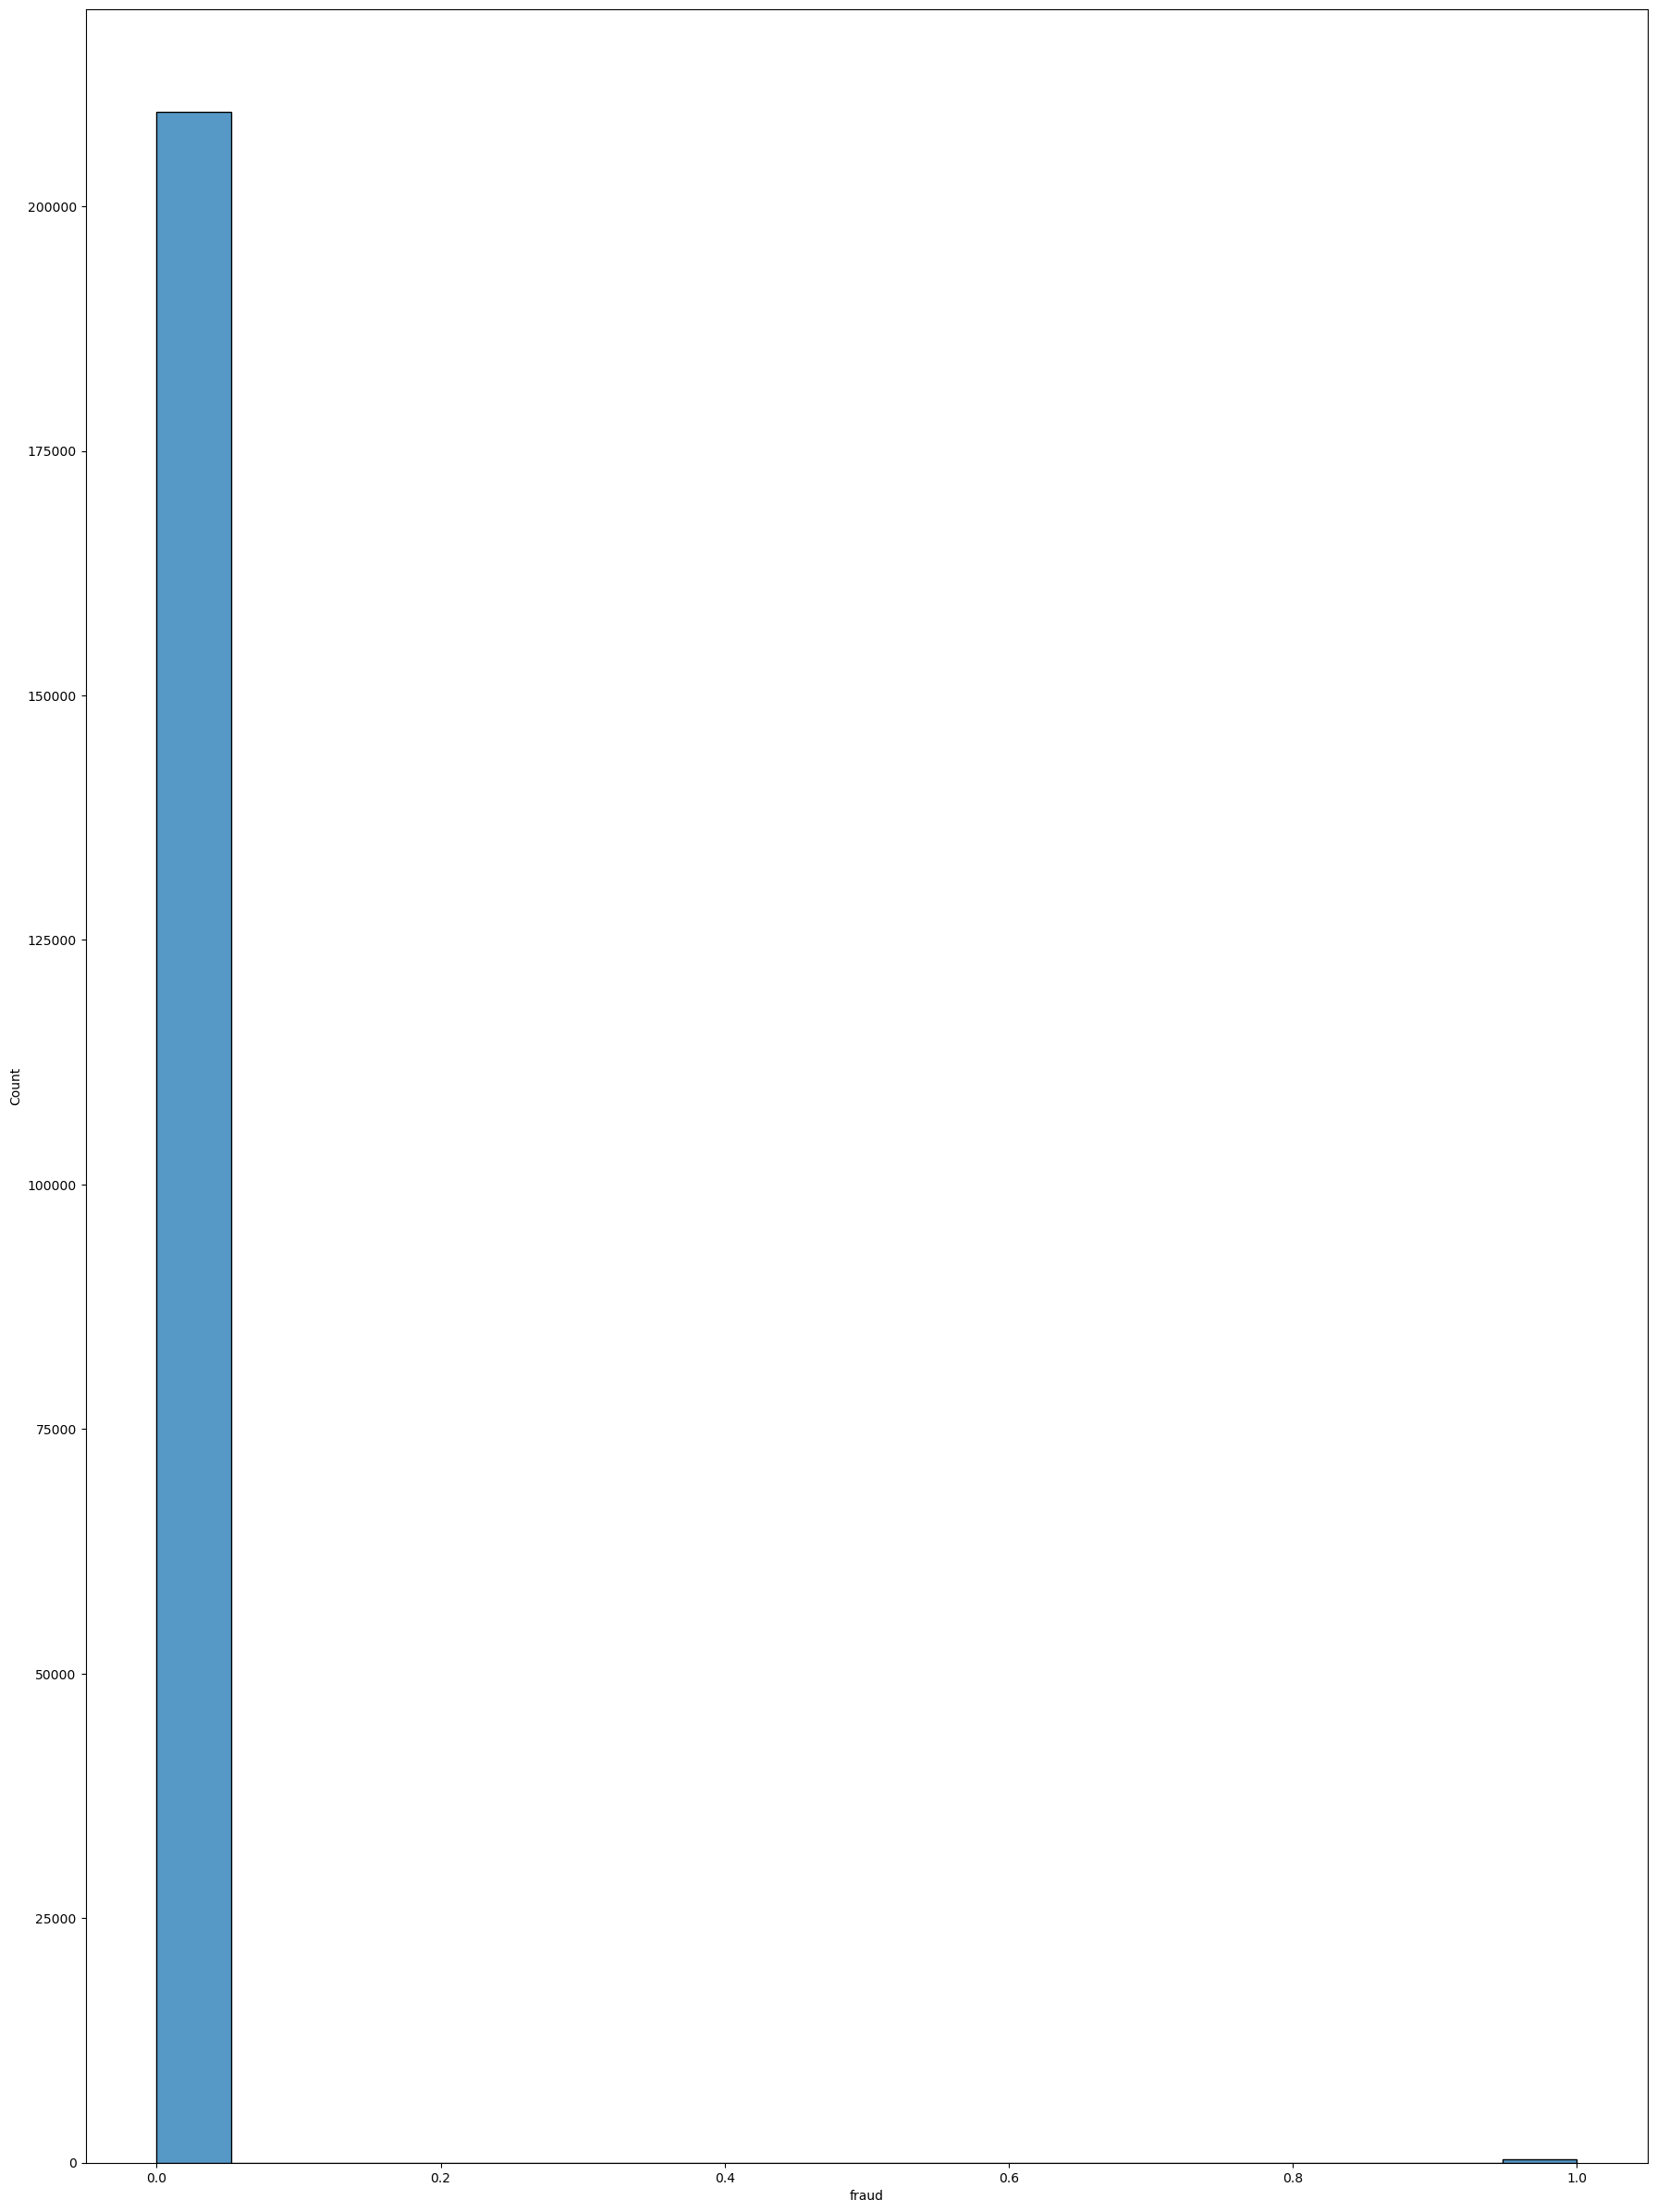

In [182]:
fig = plt.figure(figsize=(18, 24))

sns.histplot(df_train["fraud"].dropna(), kde=False)

fig.tight_layout(pad=1.0)
plt.show()

In [183]:
counts = df_train["fraud"].value_counts()
counts

fraud
0    209685
1       315
Name: count, dtype: int64

In [184]:
counts = df_train["fraud"].value_counts()/len(df_train)
counts

fraud
0    0.9985
1    0.0015
Name: count, dtype: float64

In [185]:
inverse_frequencies = 1/counts
inverse_frequencies = inverse_frequencies/inverse_frequencies.sum()
inverse_frequencies

fraud
0    0.0015
1    0.9985
Name: count, dtype: float64

<div style="color:black;
           border-radius:10px;
           background-color:#00ADB5;
           font-size:20px;
           font-family:sans-serif;
           letter-spacing:0.5px">
        <p style="padding: 6px; padding-left: 10px;
              color:white;">
            <b>1.2. Univariate Analysis</b>
        </p>
</div>


In [186]:
print(df_train.dtypes)

transaction_id             int64
date                      object
client_id                  int64
card_id                    int64
amount                    object
use_chip                  object
merchant_id                int64
merchant_city             object
merchant_state            object
zip                      float64
mcc                        int64
errors                    object
fraud                      int64
card_brand                object
card_type                 object
card_number                int64
expires                   object
cvv                        int64
has_chip                  object
num_cards_issued           int64
credit_limit              object
acct_open_date            object
year_pin_last_changed      int64
card_on_dark_web          object
current_age                int64
retirement_age             int64
birth_year                 int64
birth_month                int64
gender                    object
address                   object
latitude  

In [187]:
df_train["amount"] = df_train["amount"].str.replace("$", "", regex=False).astype(float)
df_test["amount"] = df_test["amount"].str.replace("$", "", regex=False).astype(float)

In [188]:
df_train.head()

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,19765990,2017-07-07 09:53:00,1581,2519,12.35,Chip Transaction,20519,Arnold,MO,63010.0,...,11,Female,9324 Catherine Street,38.42,-90.36,$21744,$44334,$55173,684,5
1,22160255,2018-11-26 17:44:00,1862,4049,58.29,Chip Transaction,98648,Des Moines,IA,50313.0,...,4,Female,7111 Lexington Avenue,41.57,-93.61,$18568,$37864,$57052,686,1
2,17566794,2016-03-26 12:42:00,1967,3367,11.03,Chip Transaction,46978,Lake Forest,CA,92630.0,...,9,Male,3570 North Boulevard,33.64,-117.67,$30307,$61793,$686,767,4
3,17318690,2016-02-01 08:30:00,921,3457,85.74,Chip Transaction,63701,Rush,NY,14543.0,...,5,Male,960 Mill Lane,42.98,-77.67,$26072,$54013,$3628,779,8
4,20994060,2018-03-24 14:42:00,456,2800,13.43,Chip Transaction,83271,Estero,FL,33928.0,...,10,Male,600 Grant Lane,26.63,-81.99,$17140,$34947,$49024,751,3


In [189]:
numerical_features = df_train.select_dtypes(exclude=['object']).copy()
numerical_features = numerical_features.drop(columns=['transaction_id'])
numerical_features.head()

,client_id,card_id,amount,merchant_id,zip,mcc,fraud,card_number,cvv,num_cards_issued,year_pin_last_changed,current_age,retirement_age,birth_year,birth_month,latitude,longitude,credit_score,num_credit_cards
0,1581,2519,12.35,20519,63010.0,5942,0,4564719638698318,446,1,2015,38,65,1981,11,38.42,-90.36,684,5
1,1862,4049,58.29,98648,50313.0,5814,0,4495571717001479,778,2,2016,25,65,1994,4,41.57,-93.61,686,1
2,1967,3367,11.03,46978,92630.0,5411,0,4738213924782743,383,2,2011,55,74,1964,9,33.64,-117.67,767,4
3,921,3457,85.74,63701,14543.0,5411,0,4319734914723878,720,1,2009,74,66,1945,5,42.98,-77.67,779,8
4,456,2800,13.43,83271,33928.0,4214,0,4751933848032848,614,1,2009,54,63,1965,10,26.63,-81.99,751,3


In [190]:
categorical_features = df_train.select_dtypes(include=['object']).copy()
categorical_features.head()

,date,use_chip,merchant_city,merchant_state,errors,card_brand,card_type,expires,has_chip,credit_limit,acct_open_date,card_on_dark_web,gender,address,per_capita_income,yearly_income,total_debt
0,2017-07-07 09:53:00,Chip Transaction,Arnold,MO,NaN,Visa,Debit,12/2020,YES,$26596,04/2006,No,Female,9324 Catherine Street,$21744,$44334,$55173
1,2018-11-26 17:44:00,Chip Transaction,Des Moines,IA,NaN,Visa,Credit,09/2023,YES,$10200,07/2016,No,Female,7111 Lexington Avenue,$18568,$37864,$57052
2,2016-03-26 12:42:00,Chip Transaction,Lake Forest,CA,NaN,Visa,Debit,09/2020,YES,$38120,06/2007,No,Male,3570 North Boulevard,$30307,$61793,$686
3,2016-02-01 08:30:00,Chip Transaction,Rush,NY,NaN,Visa,Debit,05/2020,YES,$35073,06/2009,No,Male,960 Mill Lane,$26072,$54013,$3628
4,2018-03-24 14:42:00,Chip Transaction,Estero,FL,NaN,Visa,Credit,12/2024,YES,$5800,05/1998,No,Male,600 Grant Lane,$17140,$34947,$49024


In [191]:
print(numerical_features.columns)
print(categorical_features.columns)

Index(['client_id', 'card_id', 'amount', 'merchant_id', 'zip', 'mcc', 'fraud',
       'card_number', 'cvv', 'num_cards_issued', 'year_pin_last_changed',
       'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'latitude', 'longitude', 'credit_score', 'num_credit_cards'],
      dtype='object')
Index(['date', 'use_chip', 'merchant_city', 'merchant_state', 'errors',
       'card_brand', 'card_type', 'expires', 'has_chip', 'credit_limit',
       'acct_open_date', 'card_on_dark_web', 'gender', 'address',
       'per_capita_income', 'yearly_income', 'total_debt'],
      dtype='object')


In [192]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(categorical_features.columns):
    plt.subplot(7,3,index+1)
    sns.countplot(x=col, data=categorical_features.dropna(),palette='bright')
fig.tight_layout(pad=1.0)
plt.show()

KeyboardInterrupt: 

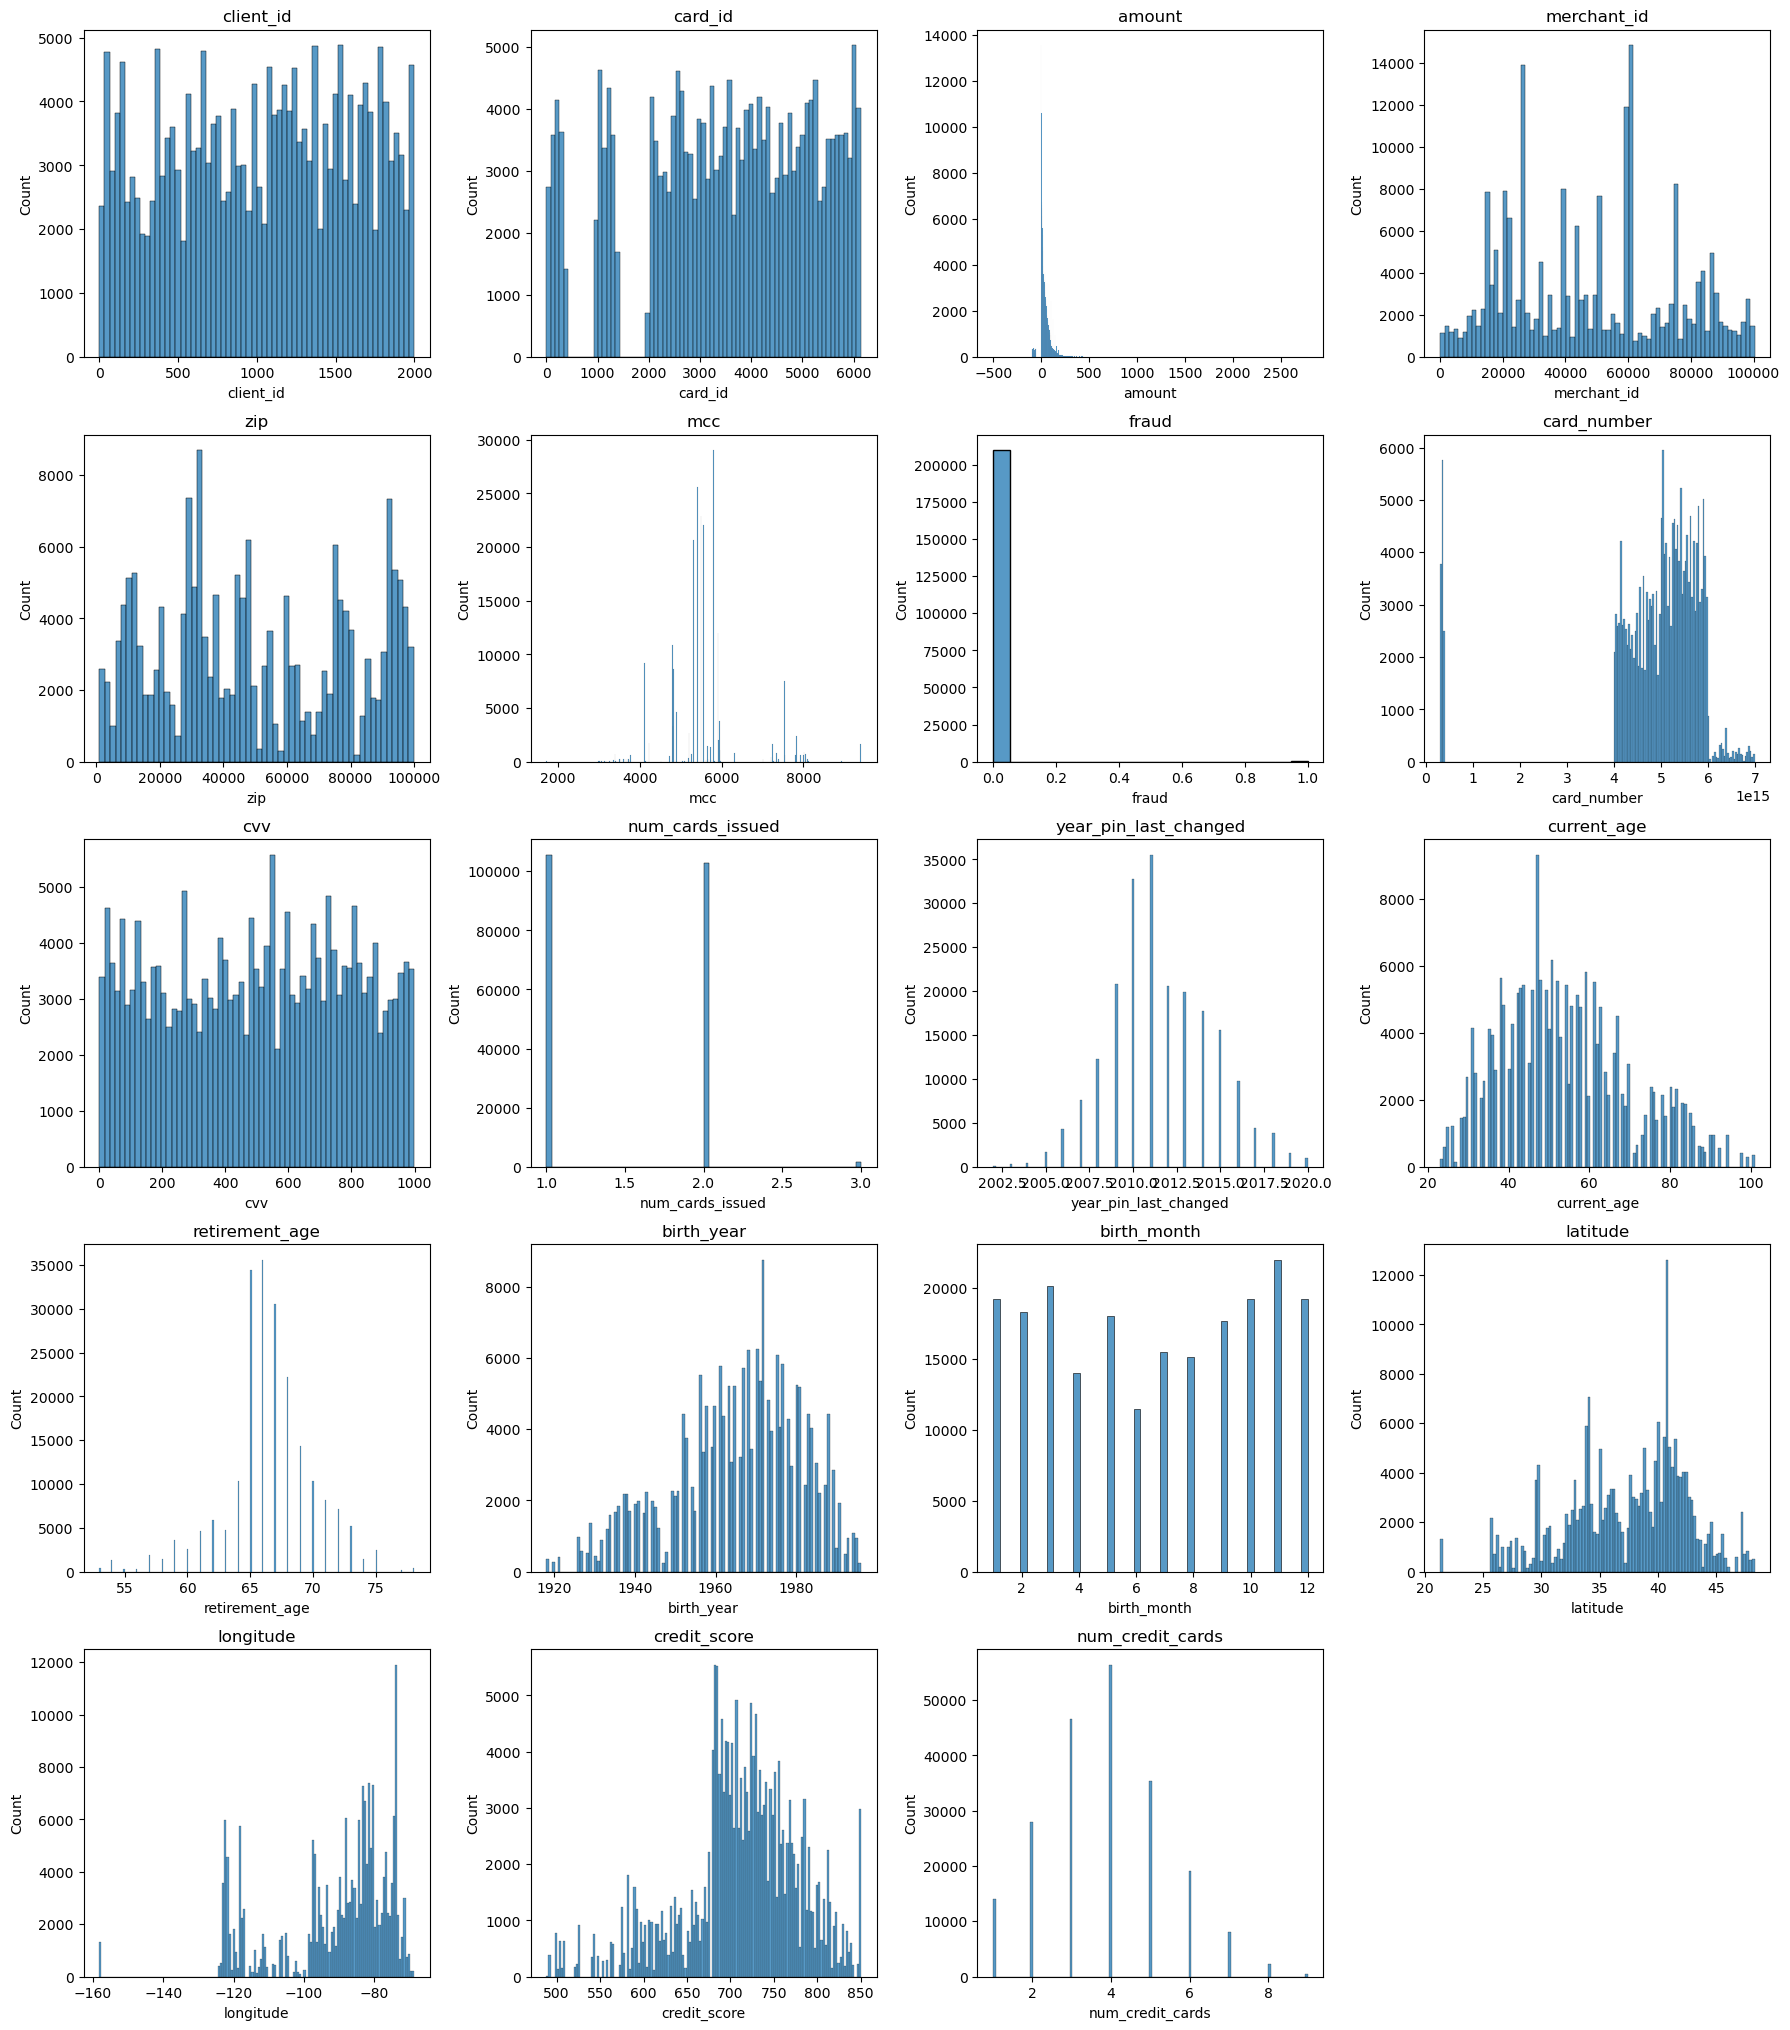

In [101]:
fig = plt.figure(figsize=(18, 24))
num_plots = len(numerical_features)

for index, col in enumerate(numerical_features.columns):
    plt.subplot(6, 4, index+1)
    sns.histplot(numerical_features[col].dropna(), kde=False)
    plt.title(col)  # Add column name as title

fig.tight_layout(pad=1.0)
plt.show()

## Feature Engineering

Date -> variables booléennes (morning, afternoon, night)

In [102]:
df_train["date"] = pd.to_datetime(df_train["date"])
hours = df_train["date"].dt.hour

hours = df_train["date"].dt.hour
df_train["is_morning"] = hours.between(5, 11)
df_train["is_afternoon"] = hours.between(12, 17)
df_train["is_night"] = ~df_train["is_morning"] & ~df_train["is_afternoon"]
df_train[["is_morning", "is_afternoon", "is_night"]] = df_train[["is_morning", "is_afternoon", "is_night"]].astype(int)

In [103]:
df_train.drop(columns=["date"], inplace=True)
df_train.head()

,transaction_id,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,...,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,is_morning,is_afternoon,is_night
0,19765990,1581,2519,12.35,Chip Transaction,20519,Arnold,MO,63010.0,5942,...,38.42,-90.36,$21744,$44334,$55173,684,5,1,0,0
1,22160255,1862,4049,58.29,Chip Transaction,98648,Des Moines,IA,50313.0,5814,...,41.57,-93.61,$18568,$37864,$57052,686,1,0,1,0
2,17566794,1967,3367,11.03,Chip Transaction,46978,Lake Forest,CA,92630.0,5411,...,33.64,-117.67,$30307,$61793,$686,767,4,0,1,0
3,17318690,921,3457,85.74,Chip Transaction,63701,Rush,NY,14543.0,5411,...,42.98,-77.67,$26072,$54013,$3628,779,8,1,0,0
4,20994060,456,2800,13.43,Chip Transaction,83271,Estero,FL,33928.0,4214,...,26.63,-81.99,$17140,$34947,$49024,751,3,0,1,0


## Stats on frauds

In [104]:
df_fd = df_train[df_train["fraud"]==1]
#df_fd["amount"] = df_fd["amount"].str.replace("$", "", regex=False).astype(float)

In [105]:
df_fd.head()

,transaction_id,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,...,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,is_morning,is_afternoon,is_night
690,20881231,1485,4736,58.52,Chip Transaction,99370,Rome,Italy,NaN,5311,...,33.41,-96.57,$24402,$49756,$89743,618,4,0,1,0
877,21673111,351,2664,0.70,Chip Transaction,31893,Rome,Italy,NaN,5311,...,40.77,-73.84,$13810,$17150,$375,807,6,0,1,0
1511,17581263,1229,2427,306.40,Online Transaction,99370,ONLINE,NaN,NaN,5311,...,35.18,-79.46,$24206,$49350,$20942,713,6,0,1,0
2317,17334384,1879,5399,83.86,Online Transaction,27092,ONLINE,NaN,NaN,4829,...,35.66,-80.48,$18724,$38179,$50559,609,2,0,1,0
2367,18162195,1843,249,47.51,Online Transaction,81477,ONLINE,NaN,NaN,5311,...,41.50,-87.63,$16503,$38761,$69,760,7,0,1,0


In [106]:
categorical_features_fraud = df_fd.select_dtypes(include=['object']).copy()
categorical_features_fraud.head()
len(categorical_features_fraud)

315

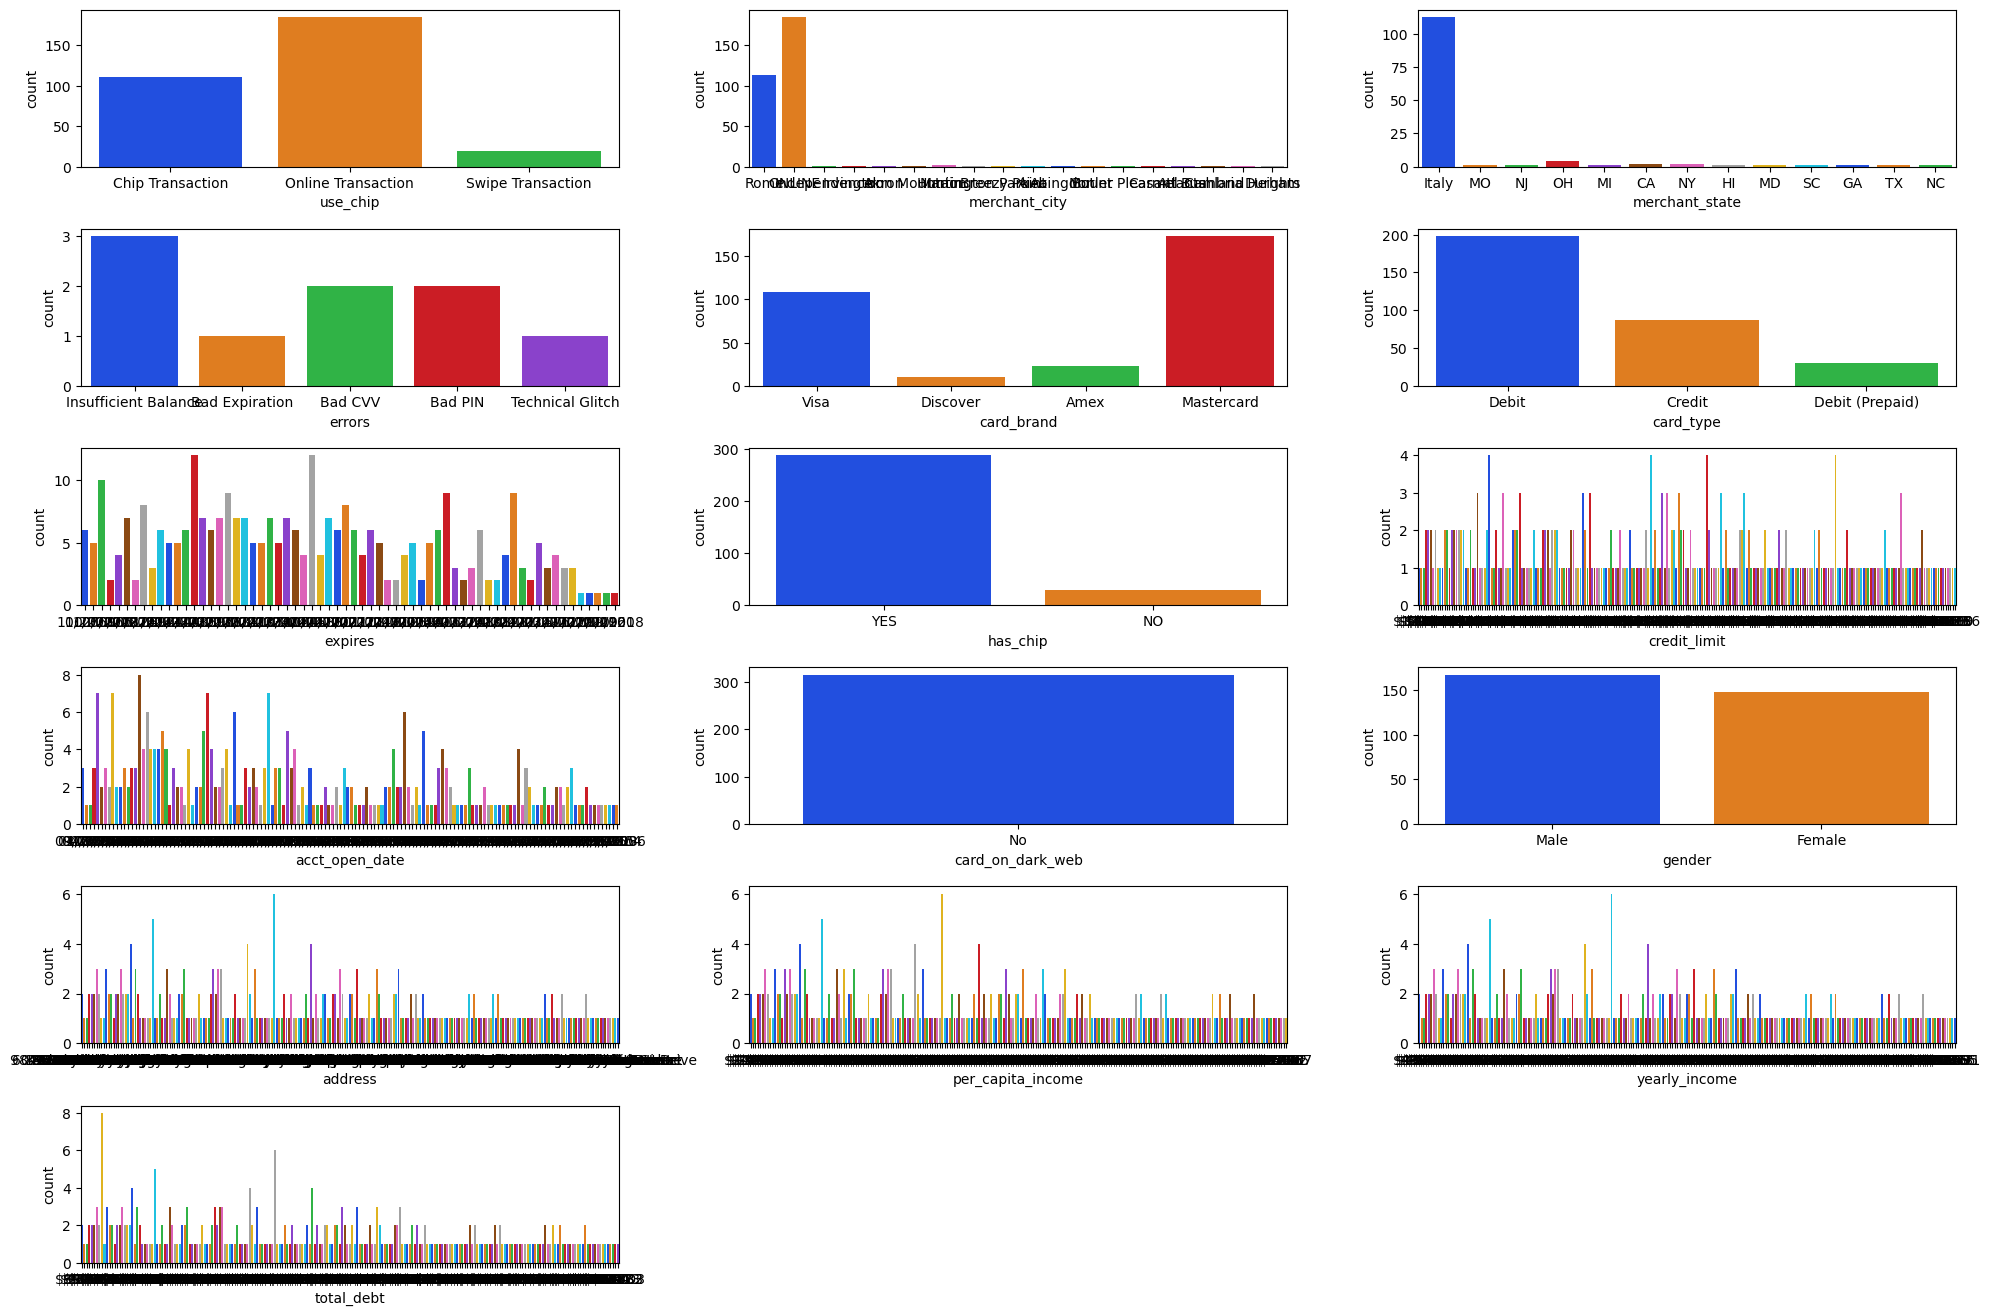

In [107]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(categorical_features_fraud.columns):
    plt.subplot(7,3,index+1)
    sns.countplot(x=col, data=categorical_features_fraud,palette='bright')
    
fig.tight_layout(pad=1.0)
plt.show()

In [108]:
df_fd[df_fd["amount"] > 0]

,transaction_id,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,fraud,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,is_morning,is_afternoon,is_night
690,20881231,1485,4736,58.52,Chip Transaction,99370,Rome,Italy,NaN,5311,NaN,1,Visa,Debit,4998107869531292,11/2023,358,YES,1,$12783,09/2009,2015,No,64,69,1955,10,Male,1350 Lake Drive,33.41,-96.57,$24402,$49756,$89743,618,4,0,1,0
877,21673111,351,2664,0.70,Chip Transaction,31893,Rome,Italy,NaN,5311,NaN,1,Visa,Debit,4760435386907937,01/2022,2,YES,2,$5080,04/2010,2010,No,91,70,1928,9,Female,984 Little Creek Lane,40.77,-73.84,$13810,$17150,$375,807,6,0,1,0
1511,17581263,1229,2427,306.40,Online Transaction,99370,ONLINE,NaN,NaN,5311,NaN,1,Discover,Credit,6868773214447881,02/2020,279,YES,1,$12600,04/2002,2010,No,50,66,1970,2,Male,421 Essex Street,35.18,-79.46,$24206,$49350,$20942,713,6,0,1,0
2317,17334384,1879,5399,83.86,Online Transaction,27092,ONLINE,NaN,NaN,4829,NaN,1,Amex,Credit,320871039524025,07/2018,845,YES,1,$4100,11/2004,2009,No,50,60,1969,5,Male,659 Valley Drive,35.66,-80.48,$18724,$38179,$50559,609,2,0,1,0
2367,18162195,1843,249,47.51,Online Transaction,81477,ONLINE,NaN,NaN,5311,Insufficient Balance,1,Visa,Debit,4348922167384229,06/2022,256,YES,2,$8702,01/2010,2014,No,89,73,1930,11,Male,89 Wessex Street,41.50,-87.63,$16503,$38761,$69,760,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207213,21783703,1444,5965,12.92,Chip Transaction,31893,Rome,Italy,NaN,5311,NaN,1,Mastercard,Debit,5143782902956271,10/2023,803,YES,1,$22886,12/2009,2009,No,64,67,1955,10,Male,8999 Washington Drive,40.63,-73.63,$32805,$66885,$144703,698,7,0,0,1
207414,18246897,901,3729,46.73,Online Transaction,18563,ONLINE,NaN,NaN,4121,NaN,1,Discover,Credit,6630783814792741,08/2024,24,YES,1,$9600,07/2005,2012,No,48,66,1971,9,Male,96 11th Street,30.44,-87.18,$17987,$36671,$39882,850,3,0,1,0
207732,18686841,1709,3319,4.14,Online Transaction,32858,ONLINE,NaN,NaN,5311,NaN,1,Mastercard,Debit,5109330727953243,12/2023,947,YES,2,$13461,06/2006,2010,No,62,69,1957,3,Female,628 Third Avenue,40.46,-96.37,$17420,$35519,$111115,744,1,0,1,0
208698,21777079,386,3673,1.23,Chip Transaction,66615,Rome,Italy,NaN,5921,NaN,1,Mastercard,Debit,5639527120868397,10/2023,126,YES,1,$25093,07/2002,2006,No,48,64,1971,11,Male,3034 Third Boulevard,42.26,-71.80,$24506,$49967,$62509,655,1,1,0,0


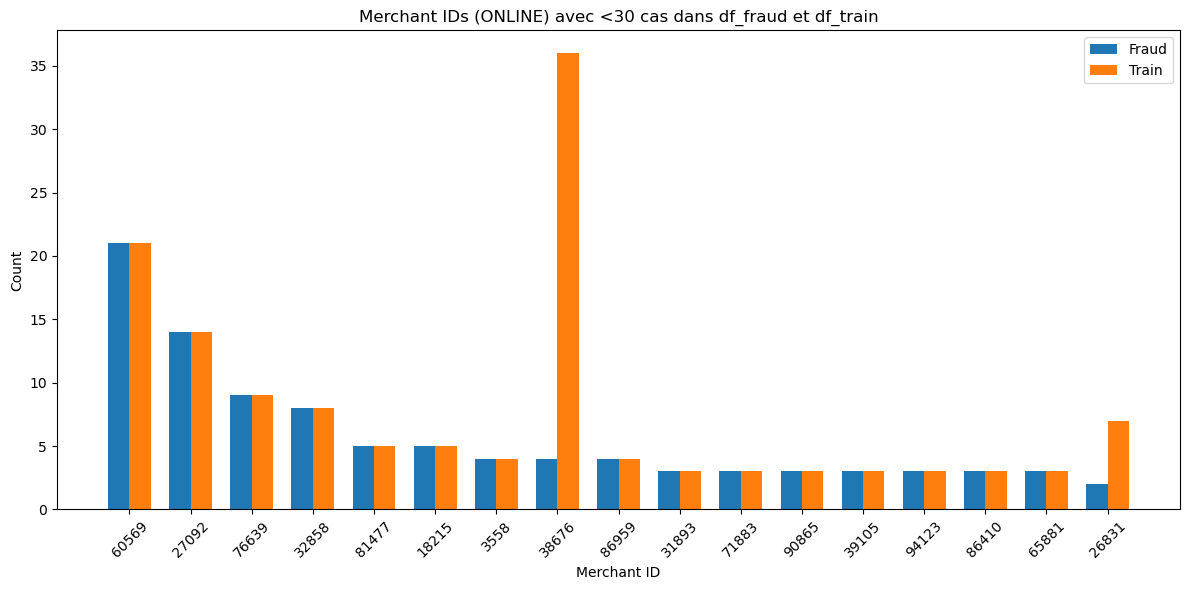

In [109]:
# Sélection des 20 merchants les plus fréquents dans df_fraud pour merchant_city = "ONLINE"
top_20_merchants = df_fd[df_fd['merchant_city'] == "ONLINE"]['merchant_id'].value_counts().head(20)

# Filtrer df_train pour ne garder que les lignes avec merchant_city = "ONLINE"
df_train_online = df_train[df_train['merchant_city'] == "ONLINE"]

# Comptage des merchant_id dans df_train filtré
train_counts = df_train_online['merchant_id'].value_counts()

# Fusion des deux comptages dans un DataFrame
merged_counts = pd.DataFrame({
    'Fraud': top_20_merchants,
    'Train': train_counts[top_20_merchants.index]
}).fillna(0)

# Filtrer pour ne garder que ceux avec < 30 dans les DEUX colonnes
filtered_counts = merged_counts[(merged_counts['Fraud'] < 40) & (merged_counts['Train'] < 40)]

# Création du graphique en barres
x = np.arange(len(filtered_counts))  # positions des groupes
width = 0.35  # largeur des barres

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, filtered_counts['Fraud'], width, label='Fraud')
ax.bar(x + width/2, filtered_counts['Train'], width, label='Train')

# Labels et titres
ax.set_xlabel('Merchant ID')
ax.set_ylabel('Count')
ax.set_title('Merchant IDs (ONLINE) avec <30 cas dans df_fraud et df_train')
ax.set_xticks(x)
ax.set_xticklabels(filtered_counts.index, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

In [139]:
# Filtrer les transactions à Rome
fraud_rome = df_fd[df_fd['merchant_city'] == "Rome"]
train_rome = df_train[df_train['merchant_city'] == "Rome"]

# Compter le nombre de fraudes par mcc
fraud_counts = fraud_rome['mcc'].value_counts()

# Compter le nombre total de transactions par mcc
total_counts = train_rome['mcc'].value_counts()

# Calculer le taux de fraude
fraud_ratio = (fraud_counts / total_counts).fillna(0)

# Garder les mcc avec un taux de fraude > 50%
high_fraud_mcc = fraud_ratio[fraud_ratio > 0.5]

# Trier par taux de fraude décroissant
high_fraud_mcc = high_fraud_mcc.sort_values(ascending=False)

# Afficher les mcc et leurs taux
print(high_fraud_mcc)

# Si tu veux juste la liste des mcc :
high_fraud_mcc_list = high_fraud_mcc.index.to_list()
print(high_fraud_mcc_list)

mcc
3009    1.000000
5311    1.000000
7011    1.000000
5932    1.000000
5813    1.000000
5733    1.000000
5712    1.000000
5651    1.000000
3359    1.000000
7230    1.000000
5094    1.000000
5045    1.000000
3722    1.000000
5310    0.875000
3389    0.857143
5499    0.733333
5912    0.666667
4121    0.600000
5921    0.600000
3509    0.571429
5411    0.545455
Name: count, dtype: float64
[3009, 5311, 7011, 5932, 5813, 5733, 5712, 5651, 3359, 7230, 5094, 5045, 3722, 5310, 3389, 5499, 5912, 4121, 5921, 3509, 5411]


In [133]:

fraud_online = df_fd[df_fd['merchant_city'] == "ONLINE"]
train_online = df_train[df_train['merchant_city'] == "ONLINE"]

# Compter fraudes et transactions par merchant_id
fraud_counts = fraud_online['merchant_id'].value_counts()
total_counts = train_online['merchant_id'].value_counts()

# Calculer taux de fraude
fraud_ratio = (fraud_counts / total_counts).fillna(0)

# Calculer score pondéré : taux * log(1 + nb fraudes)
weighted_score = fraud_ratio * np.log1p(fraud_counts)

# Construire un DataFrame résumé
summary = pd.DataFrame({
    'fraud_count': fraud_counts,
    'total_count': total_counts,
    'fraud_ratio': fraud_ratio,
    'weighted_score': weighted_score
}).fillna(0)

# Garder seulement ceux avec plus de 3 fraudes
summary_filtered = summary[summary['fraud_count'] >= 1]

# Trier par score pondéré décroissant et prendre les 70 premiers
top_70 = summary_filtered.sort_values('weighted_score', ascending=False).head(70).index.to_list()

# Afficher le résultat
print(top_70)

[60569, 27092, 76639, 32858, 18215, 81477, 3558, 86959, 39105, 65881, 71883, 86410, 90865, 94123, 31893, 78605, 67390, 48919, 47184, 41523, 39991, 95676, 99370, 19964, 19363, 30286, 16790, 32606, 9026, 20561, 67570, 92822, 34702, 13523, 72515, 7257, 78644, 15574, 82981, 83271, 83480, 86203, 59474, 57133, 39821, 52923, 4439, 51300, 49637, 38489, 29742, 45021, 54773, 30497, 42693, 30055, 26831, 38676, 86286, 83491, 75393, 89705, 76210, 6063, 47399, 52100, 70129, 84554, 88459, 85247]


In [ ]:
# Initialiser la colonne fraud_prediction à 0
df_test['fraud_prediction'] = 0

# Condition 1 : merchant_city == 'Rome' & mcc dans high_fraud_mcc
cond_rome = (df_test['merchant_city'] == 'Rome') & (df_test['mcc'].isin(high_fraud_mcc))

# Condition 2 : merchant_city == 'ONLINE' & merchant_id dans top_70_ids
cond_online = (df_test['merchant_city'] == 'ONLINE') & (df_test['merchant_id'].isin(top_70_ids))

# Appliquer la règle
df_test.loc[cond_rome | cond_online, 'fraud_prediction'] = 1

# Préparer le DataFrame final
submission = df_test[['transaction_id', 'fraud_prediction']]

# Sauvegarder en CSV sans index
submission.to_csv('submission.csv', index=False)

print("Fichier submission.csv créé avec succès.")

In [ ]:
df_train = df_train.merge(cards_data.drop(columns=["client_id"]), left_on='card_id', right_on='card_id', how="left")

In [ ]:
df_train.head()

In [ ]:
df_train.columns

In [ ]:
df_train = df_train.merge(users_data, left_on="client_id", right_on="client_id", how="left")

In [ ]:
df_train.head()

In [ ]:
df_train.columns

In [ ]:
df_train.head()

In [ ]:
df_train.columns

In [111]:
display(df_train.columns)
df_test.columns

Index(['transaction_id', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'fraud', 'card_brand', 'card_type', 'card_number', 'expires',
       'cvv', 'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web', 'current_age',
       'retirement_age', 'birth_year', 'birth_month', 'gender', 'address',
       'latitude', 'longitude', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards', 'is_morning',
       'is_afternoon', 'is_night'],
      dtype='object')

Index(['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'card_brand', 'card_type', 'card_number', 'expires', 'cvv',
       'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web', 'current_age',
       'retirement_age', 'birth_year', 'birth_month', 'gender', 'address',
       'latitude', 'longitude', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards'],
      dtype='object')

In [131]:
"ONLINE" in df_train["merchant_city"].unique()
type(df_train["year_pin_last_changed"][0])

numpy.int64

In [147]:
features_train_to_keep = ["merchant_id", "amount", "mcc", "year_pin_last_changed", "current_age", "retirement_age", "credit_score", "merchant_city", "fraud"]
features_test_to_keep = features_train_to_keep.copy()
features_test_to_keep.remove("fraud")
df_train_filtered = df_train.copy()
df_test_filtered = df_test.copy()
df_train_filtered = df_train_filtered[features_train_to_keep]
df_test_filtered = df_test_filtered[features_test_to_keep]


df_train_filtered["is_Rome"] = (df_train_filtered["merchant_city"] == "Rome").astype(int)
df_train_filtered["is_Online"] = (df_train_filtered["merchant_city"] == "ONLINE").astype(int)
df_train_filtered.drop(columns=["merchant_city"], inplace=True)

df_test_filtered["is_Rome"] = (df_test_filtered["merchant_city"] == "Rome").astype(int)
df_test_filtered["is_Online"] = (df_test_filtered["merchant_city"] == "ONLINE").astype(int)
df_test_filtered.drop(columns=["merchant_city"], inplace=True)

In [193]:
print(df_train_filtered.dtypes)

merchant_id                int64
amount                   float64
mcc                        int64
year_pin_last_changed      int64
current_age                int64
retirement_age             int64
credit_score               int64
fraud                      int64
is_Rome                    int64
is_Online                  int64
dtype: object


In [194]:
df_train_filtered.head()
df_test_filtered.head()

,merchant_id,amount,mcc,year_pin_last_changed,current_age,retirement_age,credit_score,is_Rome,is_Online
0,61195,118.61,5541,2009,36,65,735,0,0
1,49637,-204.00,3509,2010,92,67,707,0,0
2,43293,-99.00,5499,2016,31,60,617,0,0
3,26032,28.44,7210,2019,36,67,735,0,0
4,39021,32.02,4784,2011,41,65,664,0,1


In [136]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X = df_train_filtered.drop(columns=["fraud"])
y = df_train_filtered["fraud"]

# Random Forest Classifier
grid_search_params = {
    '__classifier__n_estimators': [50, 100],
    '__classifier__max_depth': [None, 10, 20],
    '__classifier__min_samples_split': [2, 5],
    '__classifier__min_samples_leaf': [1, 2]
}

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

grid_rf = GridSearchCV(
    estimator=pipeline,
    param_grid=grid_search_params,
    scoring='f1',
    cv=cv,
    verbose=1,
    n_jobs=-1
)

grid_rf.fit(X, y)
print("Best training parameters for Random Forest Classifier:", grid_rf.best_params_)
print("Best training score for Random Forest Classifier:", grid_rf.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best training parameters for Random Forest Classifier: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best training score for Random Forest Classifier: 0.6223001102971648


                       importance
is_Rome                  0.270070
mcc                      0.218687
merchant_id              0.136572
amount                   0.133151
credit_score             0.067649
current_age              0.051218
retirement_age           0.046985
is_Online                0.037894
year_pin_last_changed    0.037774


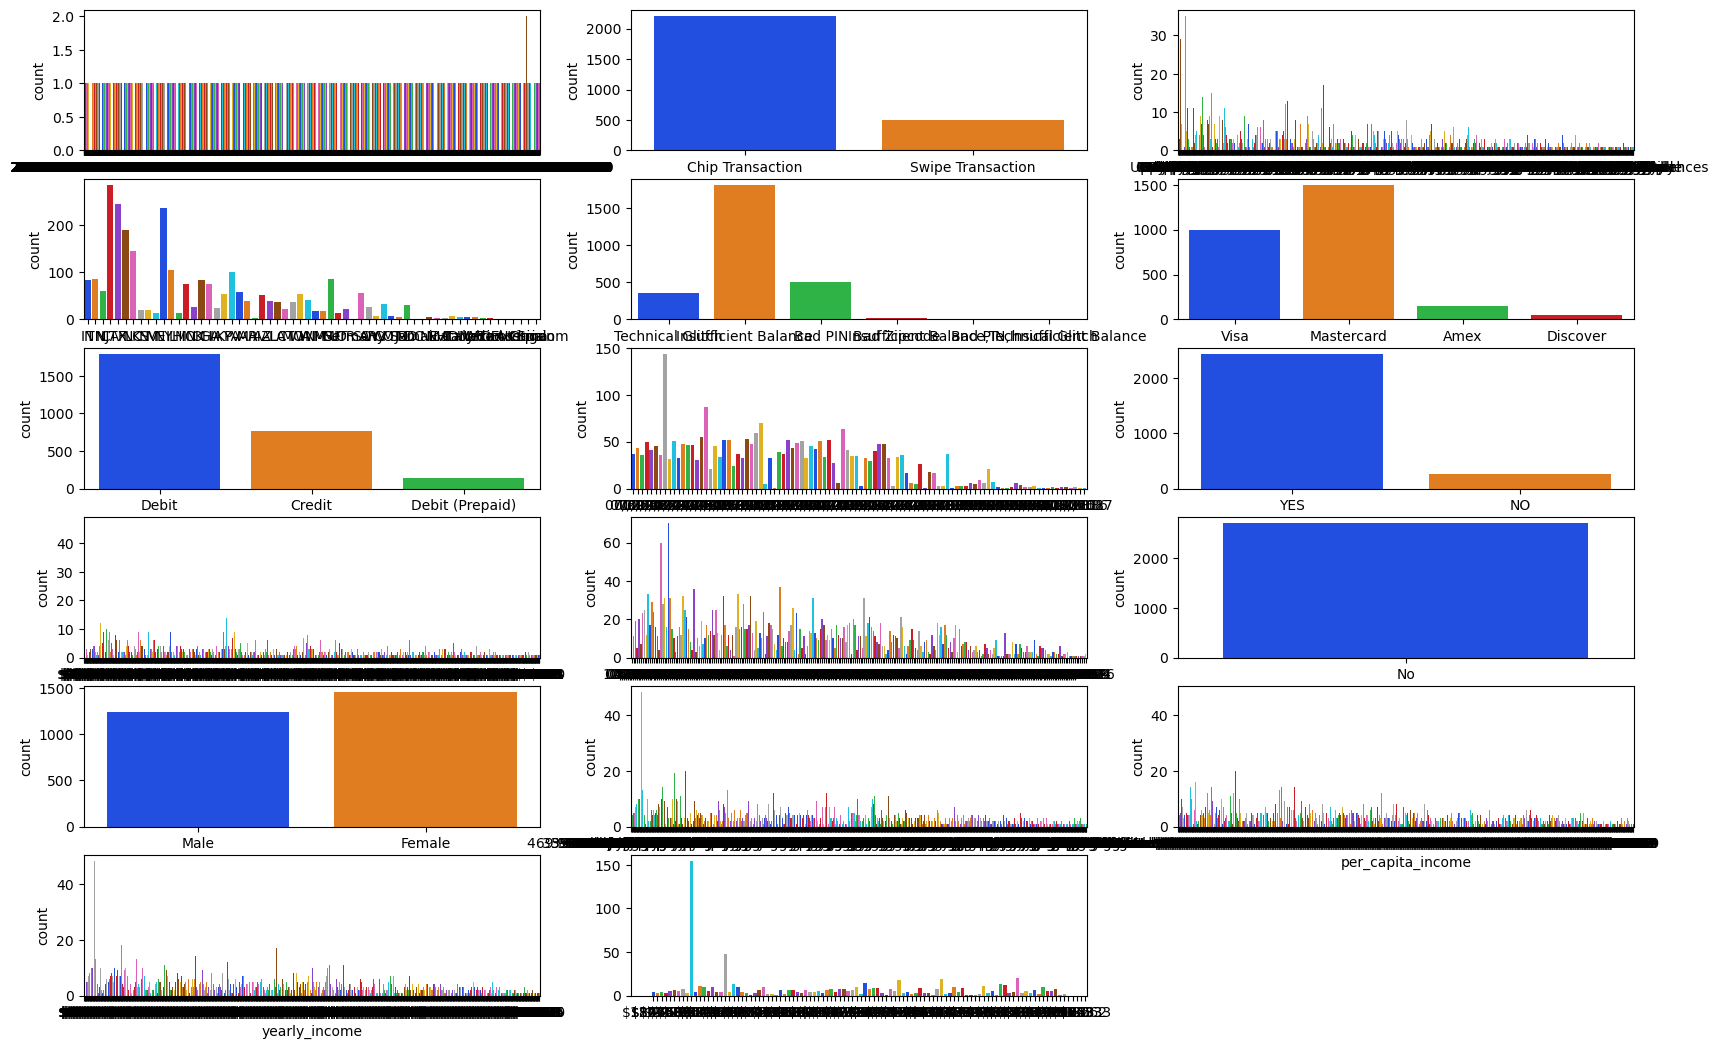

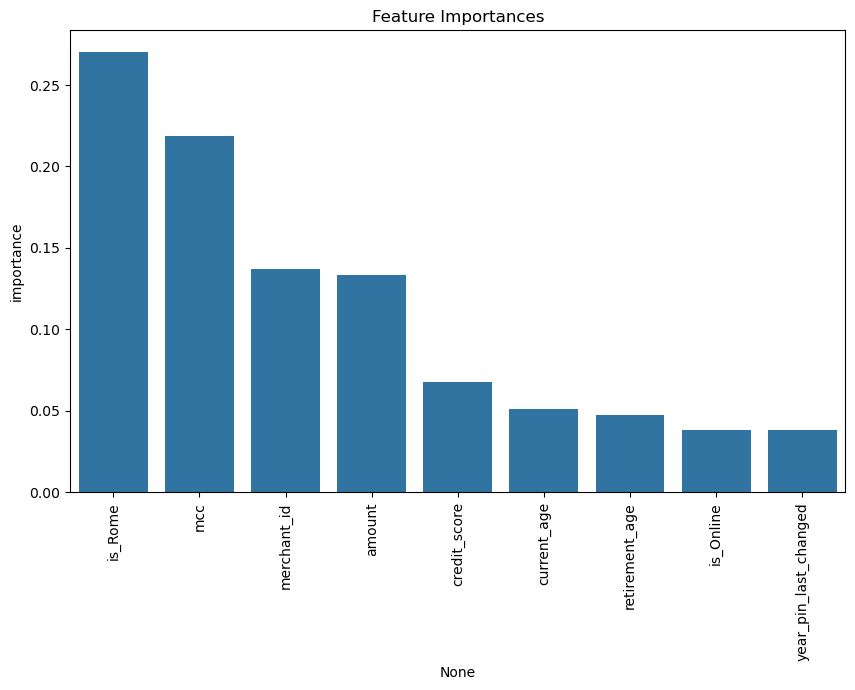

In [196]:
X = df_train_filtered.drop(columns=["fraud"])
y = df_train_filtered["fraud"]
X_test = df_test_filtered
rf = RandomForestClassifier(**grid_rf.best_params_, random_state=42)
rf.fit(X, y)
features = rf.feature_importances_

feature_importances = pd.DataFrame(features, index=X.columns, columns=["importance"]).sort_values("importance", ascending=False)
print(feature_importances)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances["importance"])
plt.xticks(rotation=90)
plt.title("Feature Importances")
plt.show()

rf_pred = rf.predict(X_test)

# To save the predictions
submission_1 = pd.DataFrame({
    'id': df_test['transaction_id'],
    'fraud_prediction': rf_pred
})
submission_1.to_csv('submission_rf.csv', index=False)

In [199]:
# XGBoost Classifier
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
} 
grid_xgb = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=grid_search_params,
    scoring='f1',
    cv=cv,
    verbose=1,
    n_jobs=-1
)

grid_xgb.fit(X, y)
print("Best training parameters for XGBoost Classifier:", grid_xgb.best_params_)
print("Best training score for XGBoost Classifier:", grid_xgb.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best training parameters for XGBoost Classifier: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Best training score for XGBoost Classifier: 0.719720541141102


In [200]:
xgb = XGBClassifier(**grid_xgb.best_params_, random_state=42)
xgb.fit(X, y)
xgb_pred = xgb.predict(X_test)
# To save the predictions
submission_2 = pd.DataFrame({
    'id': df_test['transaction_id'],
    'fraud_prediction': xgb_pred
})
submission_2.to_csv('submission_xgb.csv', index=False)